In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params, pycortex_plot_utils
plot_utils.set_all_font_sizes(20)
from utils import roi_utils, default_paths, stats_utils

In [3]:
# Load results of the fitting procedure

subjects = np.arange(1,9)
n_subjects = len(subjects)

fitting_types = ['semantic_indoor_outdoor', \
                 'semantic_animacy', \
                 'semantic_natural_humanmade', \
                 'semantic_real_world_size']

n_models = len(fitting_types)

outlist = []
for fi in range(n_models):
        
    out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_types[fi], \
                                      n_from_end=0, verbose=False) \
                                       for ss in subjects]
    outlist.append(out)
out = outlist

fig_save_folder=None

skip_inds = [4,5,7,11,12, 19,20, 22, 24]
roi_def = roi_utils.multi_subject_roi_def(subjects, skip_areas=skip_inds)
roi_names =roi_def.roi_names


/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');
/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');
/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');
/user_data/mmhender/imStat/code/plotting/summary_plots.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log');


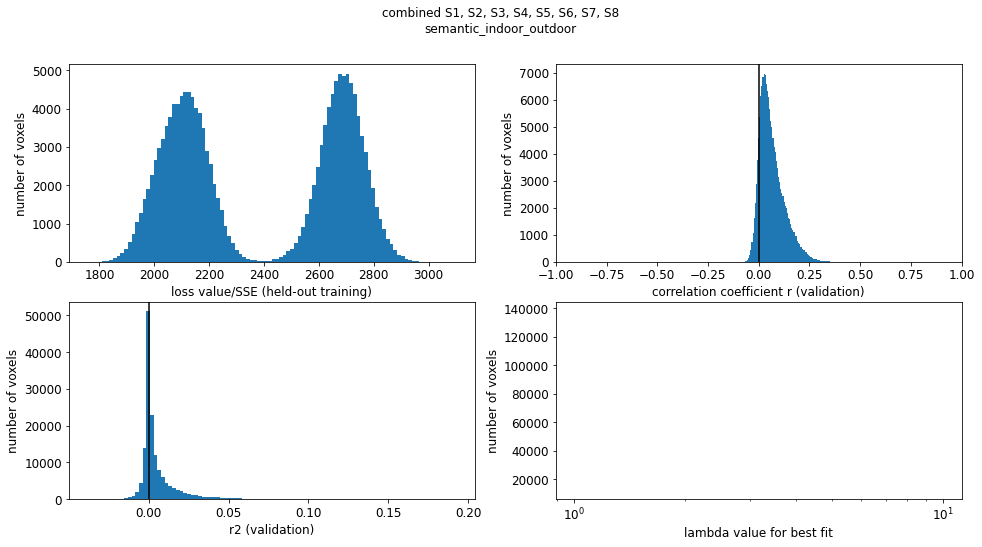

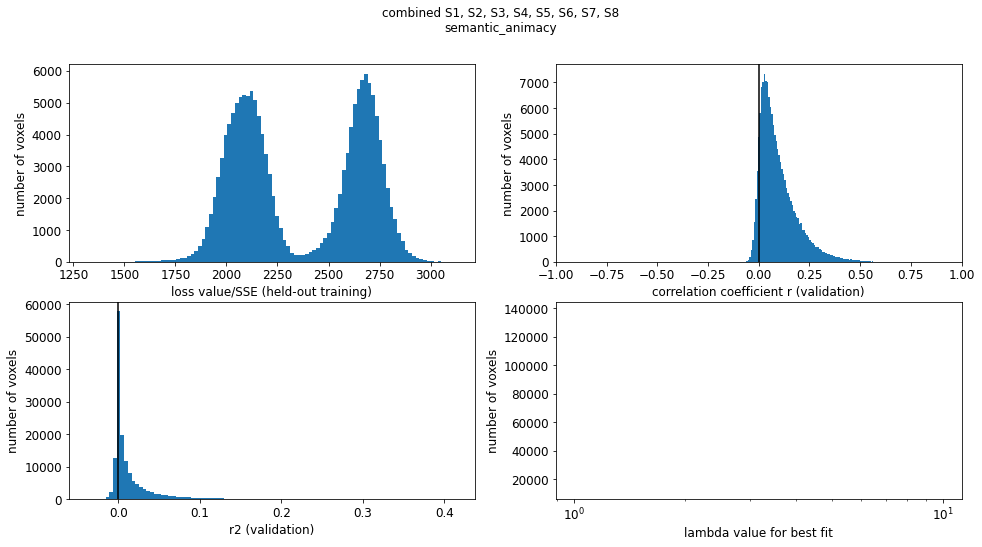

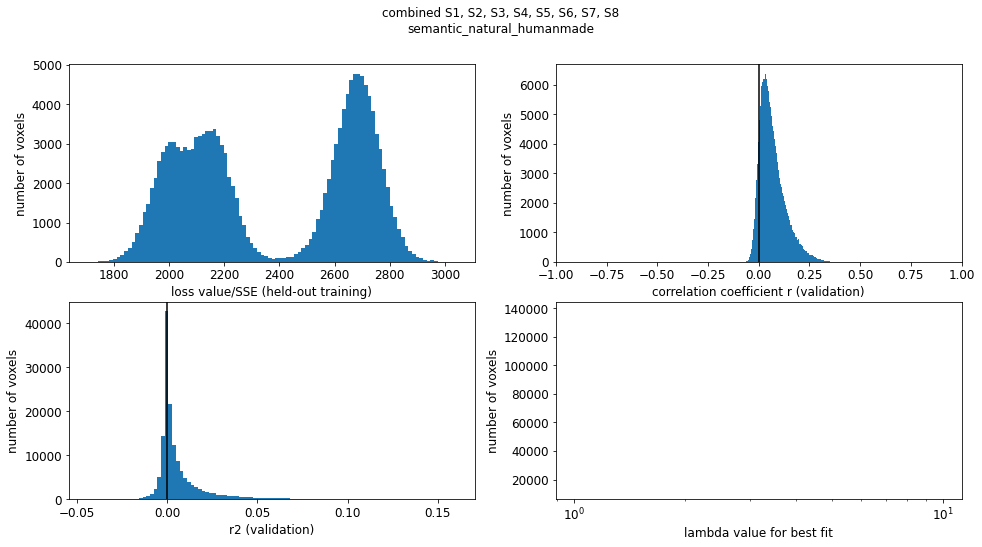

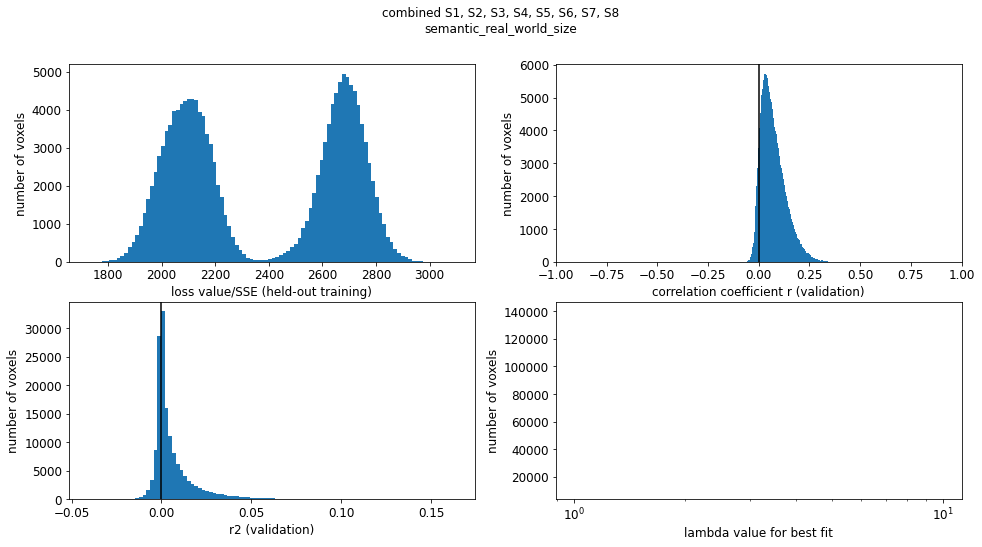

In [9]:
plot_utils.set_all_font_sizes(fs = 12)
for fi, fitting_type in enumerate(fitting_types):
    summary_plots.plot_perf_summary(fitting_type, out[fi], fig_save_folder=fig_save_folder)

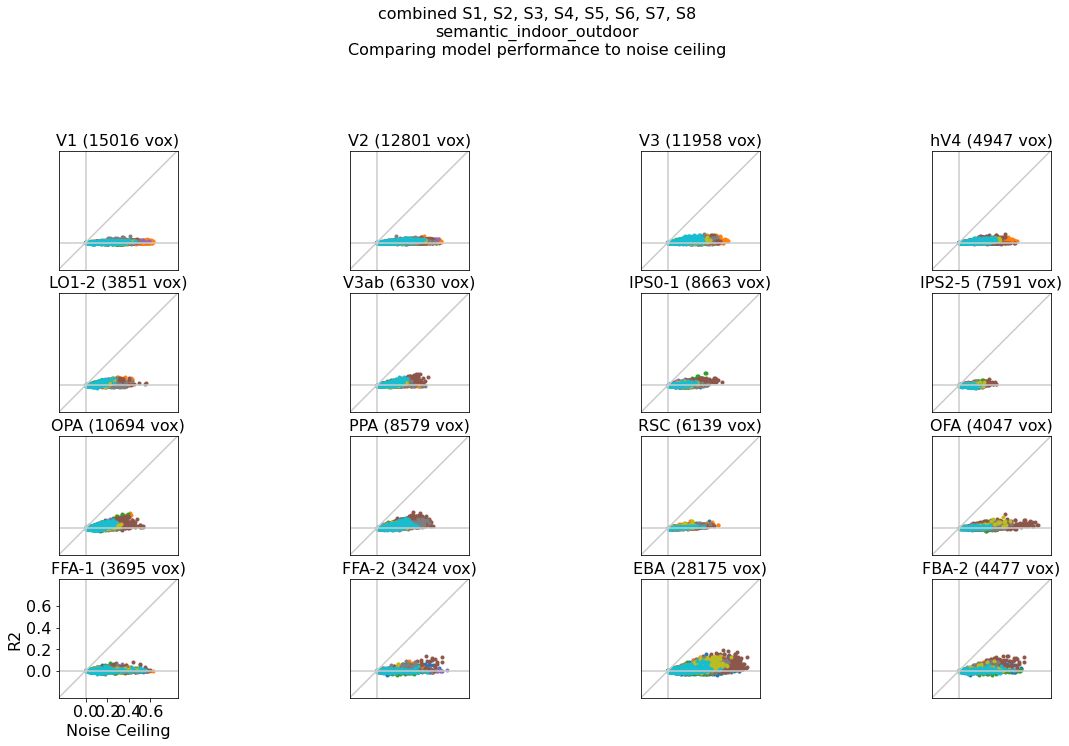

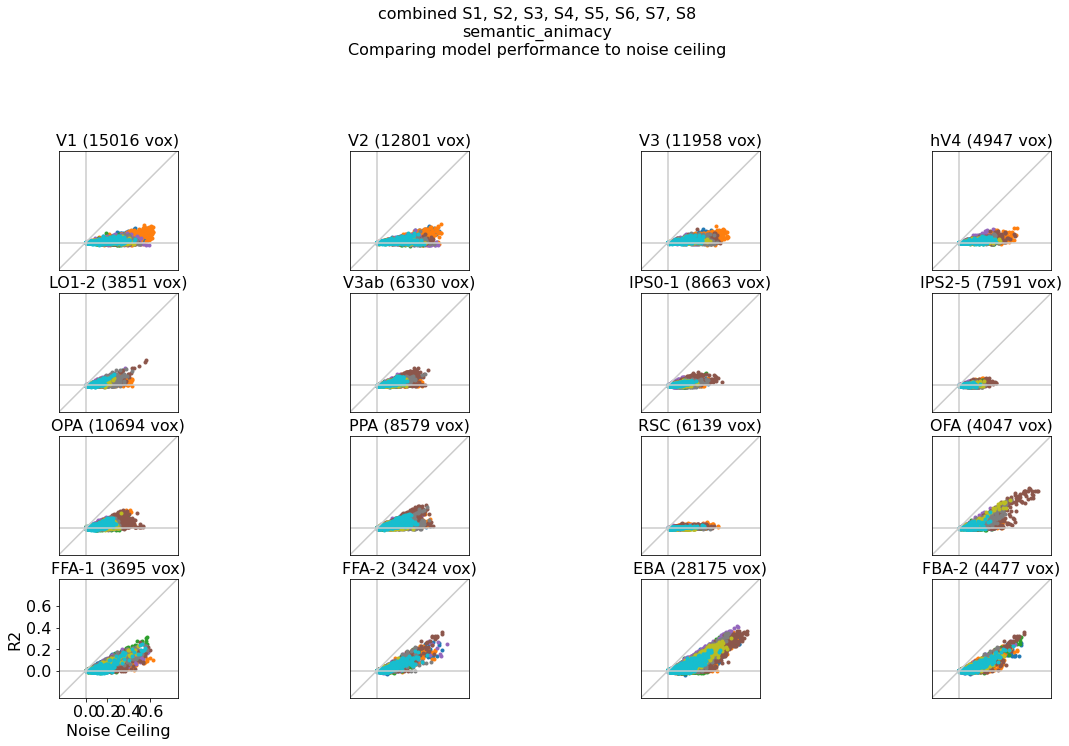

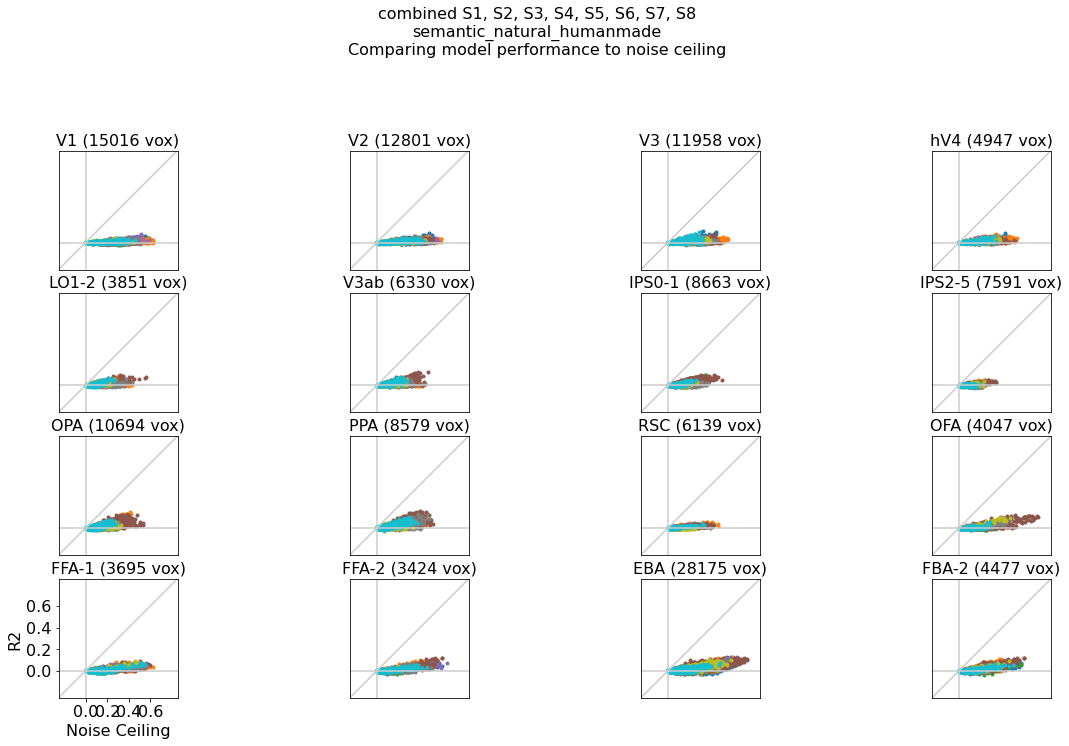

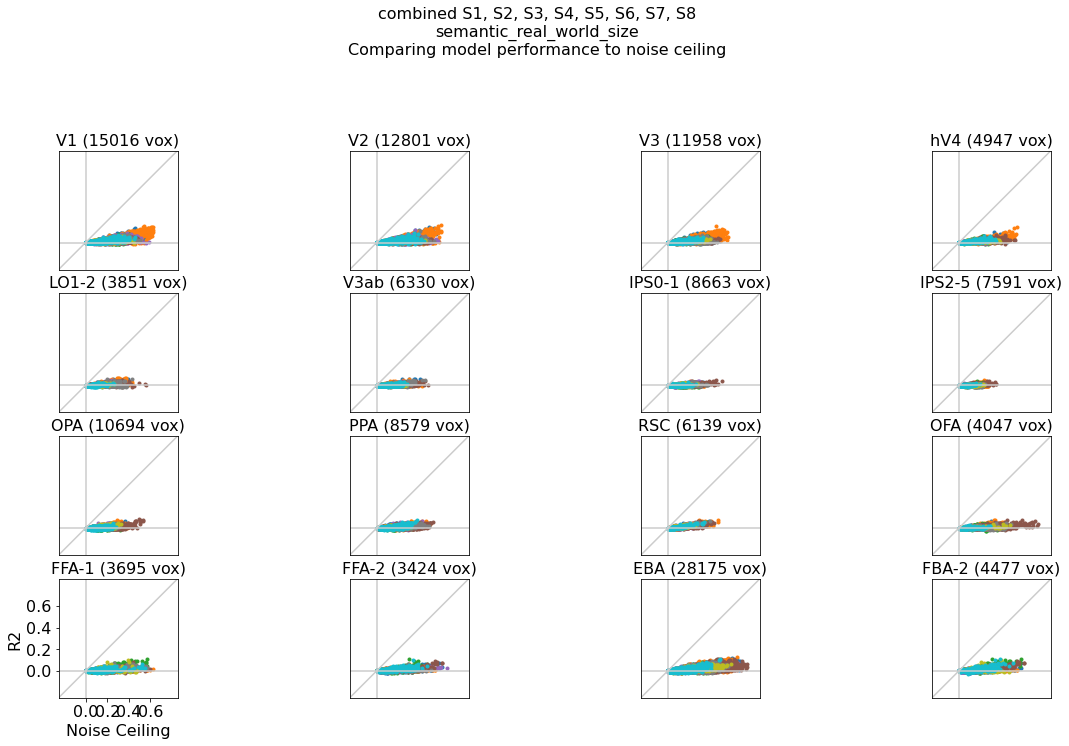

In [37]:
plot_utils.set_all_font_sizes(fs = 16)
colors = cm.tab10(np.linspace(0,1,8))
for fi, fitting_type in enumerate(fitting_types):
    summary_plots.plot_r2_vs_nc(fitting_type,outlist[fi], roi_def=roi_def,\
                                axlims = [-0.25, 0.85], fig_save_folder=fig_save_folder, \
                                fig_size=(20,20), sub_colors=colors)

In [33]:
summary_plots.plot_r2_vs_nc

<function plotting.summary_plots.plot_r2_vs_nc(fitting_type, out, roi_def, skip_inds=None, axlims=None, fig_save_folder=None, fig_size=None, sub_colors=None)>

In [15]:
import cortex
from utils import numpy_utils

port=44442

title = 'High-level semantic models, %s'%(summary_plots.get_substr(out[0]));

names = []
maps = []
cmaps = []
mins = []
maxes = []
vox2plot = []
subject_map_inds = []
map_sequence = []

for si, ss in enumerate(subjects):
    
    for fi, fitting_type in enumerate(fitting_types):

        names += ['S%d: %s (sqrt R2)'%(ss,fitting_type.split('semantic_')[1])]
        maps += [np.sqrt(out[fi][si]['val_r2'][:,0])]
        cmaps += ['PuBu']
        mins += [0]
        maxes += [0.40]

    n_voxels = out[0][si]['val_r2'].shape[0]
    vox2plot.append(np.ones((n_voxels,))==1)
    
    n_new_maps = int(len(names)/(si+1))
    subject_map_inds += [si for ii in range(n_new_maps)]
    map_sequence += [ni for ni in range(n_new_maps)]
    
# putting them into a nicer order (want same type of map near each other to compare subs)
_, new_order = numpy_utils.double_sort(np.arange(len(maps)), map_sequence, subject_map_inds)
names = [names[ni] for ni in new_order]
cmaps = [cmaps[ni] for ni in new_order]
mins = [mins[ni] for ni in new_order]
maxes = [maxes[ni] for ni in new_order]
maps = [maps[ni] for ni in new_order]
subject_map_inds = [subject_map_inds[ni] for ni in new_order]


voxel_mask = [o['voxel_mask'] for o in out[0]]
nii_shape = [o['brain_nii_shape'] for o in out[0]]
volume_space = out[0][0]['volume_space']

viewer = pycortex_plot_utils.plot_maps_pycortex(subjects, port, maps, names, subject_map_inds=subject_map_inds, \
                        mins=mins, maxes=maxes, cmaps=cmaps, \
                        title=title, vox2plot = vox2plot, roi_def=roi_def, simplest_roi_maps=True, \
                        voxel_mask =voxel_mask, \
                        nii_shape = nii_shape, \
                        volume_space=volume_space)

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


navigate browser to: 127.0.0.1:44442
Started server on port 44442


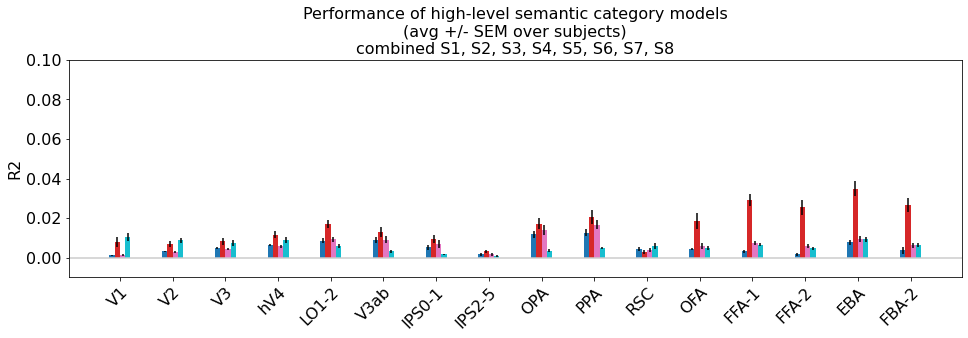

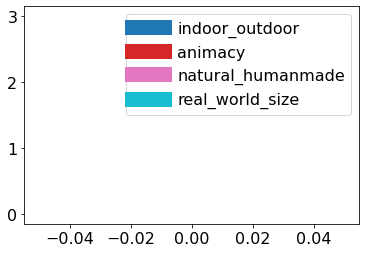

In [6]:
# plot mean performance each ROI

n_rois = roi_def.n_rois
roi_mean_vals = np.zeros((n_rois, n_models, n_subjects))

model_colors = cm.tab10(np.linspace(0,1,n_models))

for si in range(n_subjects):

    for fi in range(n_models):

        vals = out[fi][si]['val_r2'][:,0]

        for ri in range(n_rois):

            inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri)

            roi_mean_vals[ri,fi,si] = np.mean(vals[inds_this_roi])

mean_vals = np.mean(roi_mean_vals, axis=2)
sem_vals = np.std(roi_mean_vals, axis=2)/np.sqrt(n_subjects)
  
legend_separate=True
title = 'Performance of high-level semantic category models\n(avg +/- SEM over subjects)\n%s'\
    %summary_plots.get_substr(out[0])
names = [ft.split('semantic_')[1] for ft in fitting_types]

plot_utils.set_all_font_sizes(16)

fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=model_colors, space=0.3, \
                xticklabels=roi_names, ylabel='R2', \
                ylim=[-0.01, 0.10], title=title, horizontal_line_pos=0,\
                legend_labels=names, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))

    